In [1]:
import zntrack
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vs = zntrack.from_rev("BMIM_BF4_BoxScale")

mlp = zntrack.from_rev("BMIM_BF4_Prediction")
mlp_d3 = zntrack.from_rev("BMIM_BF4_Prediction_1")
dft = zntrack.from_rev("BMIM_BF4_CP2KSinglePoint")

2023-11-27 11:12:31,052 (DEBUG): Welcome to IPS - the Interatomic Potential Suite!


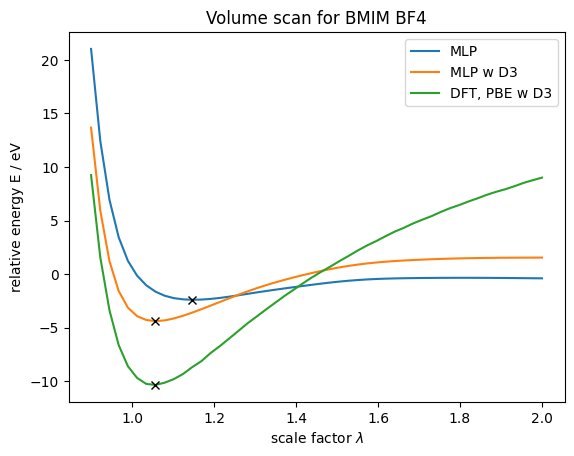

In [3]:
fig, ax = plt.subplots()

mlp_energies = np.array([x.get_potential_energy() for x in mlp.atoms])
mlp_d3_energies = np.array([x.get_potential_energy() for x in mlp_d3.atoms])
dft_energies = np.array([x.get_potential_energy() for x in dft.atoms])

x_data = np.linspace(vs.start, vs.stop, vs.num)

# subtract mean 
mlp_energies -= mlp_energies.mean()
mlp_d3_energies -= mlp_d3_energies.mean()
dft_energies -= dft_energies.mean()



# ax.plot(mlp_min, mlp_energies[mlp_min], "x",  color="black")
# ax.plot(dft_min, dft_energies[dft_min], "x", color="black")

# ax.plot(mlp_energies, label="MLP")
# ax.plot(dft_energies, label="DFT")

ax.plot(x_data, mlp_energies, label="MLP")
ax.plot(x_data, mlp_d3_energies, label="MLP w D3")
ax.plot(x_data, dft_energies, label="DFT, PBE w D3")

ax.set_xlabel("scale factor $\lambda$")

# highlight the minimum
mlp_min = mlp_energies.argmin()
mlp_d3_min = mlp_d3_energies.argmin()
dft_min = dft_energies.argmin()

ax.plot(x_data[mlp_min], mlp_energies[mlp_min], "x",  color="black")
ax.plot(x_data[dft_min], dft_energies[dft_min], "x", color="black")
ax.plot(x_data[mlp_d3_min], mlp_d3_energies[mlp_d3_min], "x", color="black")

ax.set_ylabel("relative energy E / eV")
ax.set_title("Volume scan for BMIM BF4")

ax.legend()

fig.savefig("bmim_bf4_vs.png")